In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
!pip install pandas

In [3]:
pwd

'C:\\Users\\HP'

In [5]:
cd/Users/HP/Desktop/Data Science/Project

C:\Users\HP\Desktop\Data Science\Project


In [7]:
# Importing the dataset
dataset = pd.read_csv('bank.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
X=pd.concat([X,geography,gender],axis=1)

In [12]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


Using TensorFlow backend.
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\hp\anaconda3\envs\vks_test\lib\site-pa

In [16]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.
c:\users\hp\anaconda3\envs\vks_test\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 275us/step - loss: 0.6406 - accuracy: 0.6914 - val_loss: 0.5520 - val_accuracy: 0.7948
Epoch 2/100
5359/5359 [==============================] - 1s 131us/step - loss: 0.5196 - accuracy: 0.7962 - val_loss: 0.5122 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 140us/step - loss: 0.4931 - accuracy: 0.7960 - val_loss: 0.4914 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 127us/step - loss: 0.4776 - accuracy: 0.7964 - val_loss: 0.4763 - val_accuracy: 0.7948
Epoch 5/100
5359/5359 [==============================] - 1s 124us/step - loss: 0.4641 - accuracy: 0.7964 - val_loss: 0.4625 - val_accuracy: 0.7944
Epoch 6/100
5359/5359 [==============================] - 1s 124us/step - loss: 0.4516 - accuracy: 0.7968 - val_loss: 0.4508 - val_accuracy: 0.7944
Epoch 7/100
5359/5359 [==============================] - 1s 137us/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


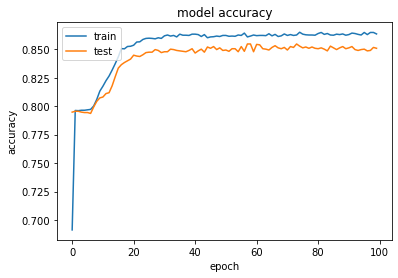

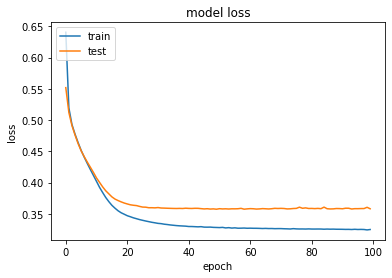

In [20]:
#list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
#Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1511,   84],
       [ 197,  208]], dtype=int64)

In [26]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8595

In [31]:
## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



In [32]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)


In [33]:
grid

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000236C9FEBA58>,
             param_grid={'activation': ['sigmoid', 'relu'],
                         'batch_size': [128, 256], 'epochs': [30],
                         'layers': [[20], [40, 20], [45, 30, 15]]})

In [37]:
#grid_result = grid.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [36]:
cm = confusion_matrix(y_pred,y_test)


In [38]:
score=accuracy_score(y_pred,y_test)